In [2]:
import copy
import math
from sklearn.metrics import silhouette_score

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm', 6: 'y', 7: 'r', 8: 'g', 9: 'b', 10: 'c', 11: 'm', 12: 'y',
         13: 'r', 14: 'g', 15: 'b', 16: 'c'}

In [4]:
data = np.loadtxt("dataset.txt", dtype="int")

In [5]:
data

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

In [6]:
data.shape

(5000, 2)

In [7]:
mx_feature = data.flatten().max()

# k_means class

In [8]:
class k_means():
    def __init__(self, data, k, seed, algorithm='random'):
        self.data = data
        self.seed = seed
        self.k = k
        self.n = data.shape[0]
        self.m = data.shape[1]
        self.mx_feature = data.flatten().max()
        self.algorithm = algorithm
        
    def set_centroids(self, data, k):
        """
        sets random centroids
        or
        finds furthest centroids
        """
        if self.algorithm == 'random':
            np.random.seed(self.seed)
            self.centroids = {
                i+1: self.data[np.random.randint(0, self.n - 1)].tolist()
                for i in range(self.k)
            }
        elif self.algorithm == 'k++':
            np.random.seed(self.seed)
            self.centroids = {1: self.data[np.random.randint(0, self.n - 1)].tolist()}
            for it in range(self.k - 1):
                dists = np.full(self.n, 0)
                for i in range(self.n):
                    dist = np.inf
                    for j in (self.centroids.keys()):
                        new_dist = 0
                        for jj in range(self.m):
                            new_dist += (self.centroids[j][jj] - self.data[i][jj]) ** 2
                        dist = min(np.sqrt(new_dist), dist)
                    dists[i] = dist
                mx = np.max(dists)
                self.centroids[it + 2] = self.data[np.where(dists == mx)[0]][0].tolist()
            
    def closest(self, data, centroids):
        """
            for all objects finds closes centroid and classifies it
        """
        distances = np.full((self.n, self.k), -1)
        for i in range(self.n):
            for j in range(self.k):
                sum_of_diff = 0
                for ii in range(self.m):
                    sum_of_diff += (self.data[i][ii] - self.centroids[j + 1][ii]) ** 2
                distances[i][j] = np.sqrt(sum_of_diff)
        closest_center = np.full(self.n, -1)
        for i in range(self.n):
            closest_center[i] = np.argmin(distances[i]) + 1
        return closest_center
    
    def update(self, distr, data):
        """
            updates centroids as mean of all objects of a corresponding class
        """
        for i in self.centroids.keys():
            self.centroids[i][0] = np.mean(self.data[np.where(distr == i)[0]].flatten()[::2])
            self.centroids[i][1] = np.mean(self.data[np.where(distr == i)[0]].flatten()[1::2])
    
    def iteration(self):
        """
            Iteration clusterization (for plots)
        """
        self.distribution = self.closest(self.data, self.centroids)
        self.update(self.distribution, self.data)
    
    def run(self):
        """
            whole algorithm
        """
        self.iterations = 1
        self.set_centroids(self.data, self.k)
        self.distribution = self.closest(self.data, self.centroids)
        self.update(self.distribution, self.data)
        while True:
            closest_centroids = self.distribution
            self.update(self.distribution, self.data)
            self.distribution = self.closest(self.data, self.centroids)
            self.iterations += 1
            if np.array_equal(closest_centroids, self.distribution):
                break

## Two examples showing final results

In [9]:
cl1 = k_means(data, 16, 1234)
cl2 = k_means(data, 15, 4)

In [10]:
cl1.run()
cl2.run()

In [11]:
col1 = [colmap[cl1.distribution[i]] for i in range(cl1.n)]

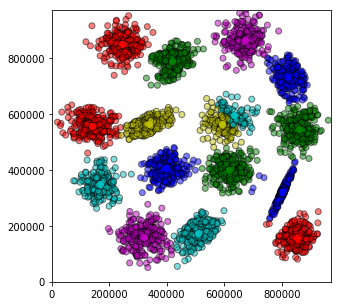

In [12]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(cl1.data[:, 0], cl1.data[:, 1], color=col1, edgecolors='k', alpha=0.5)
for i in cl1.centroids.keys():
    plt.scatter(*cl1.centroids[i], color=colmap[i])
plt.xlim(0, mx_feature)
plt.ylim(0, mx_feature)
plt.show()

In [13]:
col2 = [colmap[cl2.distribution[i]] for i in range(cl2.n)]

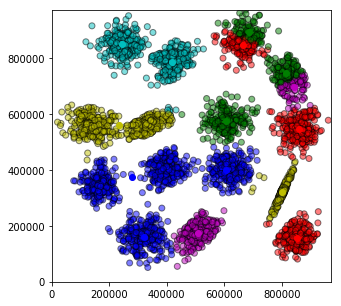

In [14]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(cl2.data[:, 0], cl2.data[:, 1], color=col2, edgecolors='k', alpha=0.5)
for i in cl2.centroids.keys():
    plt.scatter(*cl2.centroids[i], color=colmap[i])
plt.xlim(0, mx_feature)
plt.ylim(0, mx_feature)
plt.show()

## examples of 2 iterations

In [15]:
new_class = k_means(data, 15, 98)

In [16]:
new_class.set_centroids(data, new_class.k)

In [17]:
new_class.centroids

{1: [803839, 310353],
 2: [382720, 263255],
 3: [139451, 549580],
 4: [801313, 300606],
 5: [182239, 333302],
 6: [380236, 460907],
 7: [350283, 559840],
 8: [900955, 185733],
 9: [448519, 805219],
 10: [597173, 575538],
 11: [484395, 107291],
 12: [125351, 529954],
 13: [866044, 584750],
 14: [268938, 211870],
 15: [533775, 163036]}

### Выбрали рандобные точки

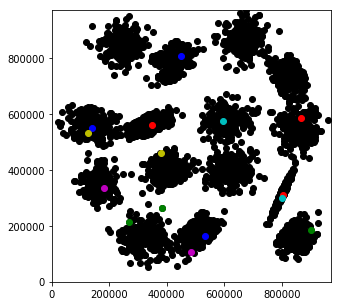

In [18]:
fig = plt.figure(figsize=(5,5))
plt.scatter(new_class.data.flatten()[::2], new_class.data.flatten()[1::2], color='k')

for i in new_class.centroids.keys():
    plt.scatter(*new_class.centroids[i], color=colmap[i])
plt.xlim(0, mx_feature)
plt.ylim(0, mx_feature)
plt.show()

### Итерация

In [19]:
old_centroids = copy.deepcopy(new_class.centroids)

In [20]:
new_class.iteration()

In [21]:
old_centroids

{1: [803839, 310353],
 2: [382720, 263255],
 3: [139451, 549580],
 4: [801313, 300606],
 5: [182239, 333302],
 6: [380236, 460907],
 7: [350283, 559840],
 8: [900955, 185733],
 9: [448519, 805219],
 10: [597173, 575538],
 11: [484395, 107291],
 12: [125351, 529954],
 13: [866044, 584750],
 14: [268938, 211870],
 15: [533775, 163036]}

In [22]:
new_class.centroids

{1: [771768.25, 340878.90853658534],
 2: [374973.3134328358, 255742.8208955224],
 3: [149638.9820143885, 574565.9316546762],
 4: [763337.0571428571, 286413.14285714284],
 5: [167991.5795795796, 347551.25525525527],
 6: [402580.8498498498, 408668.64864864864],
 7: [337880.4542682927, 562704.3018292683],
 8: [852675.8276923076, 157386.94461538462],
 9: [447286.77845528454, 834761.1697154471],
 10: [610350.1781076067, 505582.33209647494],
 11: [441247.18055555556, 126424.36111111111],
 12: [110429.425, 529928.1375],
 13: [841167.0208023774, 636627.1456166419],
 14: [309264.84420289856, 160398.41666666666],
 15: [516785.7101910828, 188393.19426751594]}

#### Отнесли точки к центроидам 

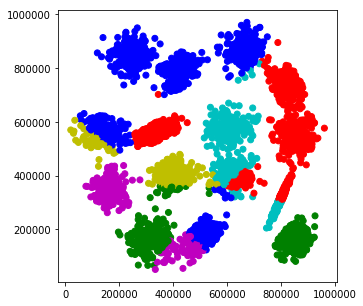

In [23]:
fig = plt.figure(figsize=(5, 5))
col3 = [colmap[new_class.distribution[i]] for i in range(new_class.n)]
plt.scatter(new_class.data[:, 0], new_class.data[:, 1], color=col3)

#### Как переместились центроиды после 1-ой итерации

/home/vsevolod/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


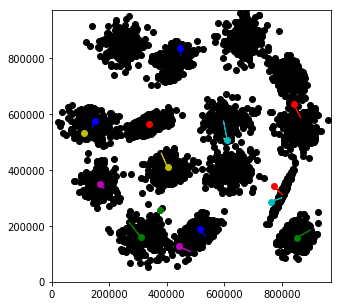

In [24]:
fig = plt.figure(figsize=(5,5))
plt.scatter(new_class.data.flatten()[::2], new_class.data.flatten()[1::2], color='k')
for i in new_class.centroids.keys():
    plt.scatter(*new_class.centroids[i], color=colmap[i])
plt.xlim(0, mx_feature)
plt.ylim(0, mx_feature)
ax = plt.axes()
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (new_class.centroids[i][0] - old_centroids[i][0])
    dy = (new_class.centroids[i][1] - old_centroids[i][1])
    ax.arrow(old_x, old_y, dx, dy, head_width=4, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

# k++

In [25]:
kpp = k_means(data, 15, 3, 'k++')

In [26]:
kpp.run()

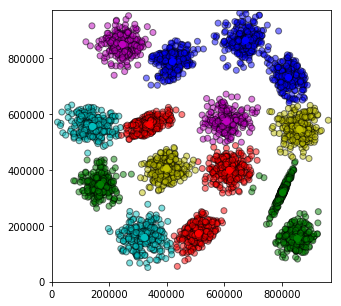

In [27]:
fig = plt.figure(figsize=(5, 5))
col4 = [colmap[kpp.distribution[i]] for i in range(kpp.n)]
plt.scatter(kpp.data[:,0], kpp.data[:,1], color=col4, edgecolors='k', alpha=0.5)
for i in kpp.centroids.keys():
    plt.scatter(*kpp.centroids[i], color=colmap[i])
plt.xlim(0, mx_feature)
plt.ylim(0, mx_feature)
plt.show()

# elbow method for finding amount of clusters

In [28]:
score = []
for k in range(2, 30):
    model = k_means(data, k, 123, algorithm='k++')
    model.run()
    score.append(silhouette_score(data, model.distribution))

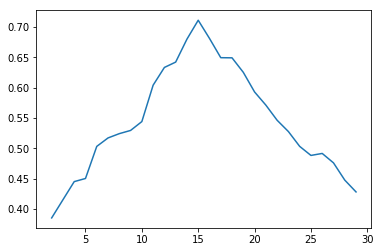

In [29]:
plt.plot(range(2, 30), score)

### С помощью метода локтя мы определили оптимальное количество кластеров 

### можно попробовать применить тернарный поиск для нахождения максимума, но функция не строго возрастает, потом строго убывает

# Матрица попарных расстояний

In [30]:
from sklearn.metrics import pairwise_distances

In [31]:
dist_pairs = pairwise_distances(data)

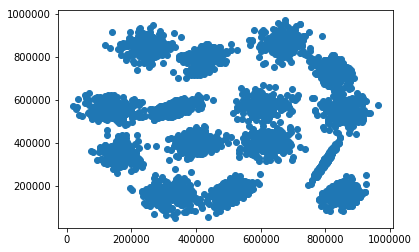

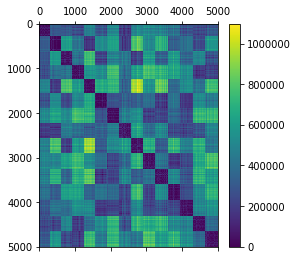

In [32]:
plt.scatter(data[:,0],data[:,1])
plt.show()
plt.matshow(dist_pairs, aspect='auto')
plt.colorbar()
plt.show()

## матрица попарных после расстояний кластеризации

In [33]:
check = k_means(data, 15, 468)
check.run()

In [34]:
distrib = np.array([0, 0])
for i in range(1, 16):
    for j in range(check.n):
        if check.distribution[j] == i:
            distrib = np.vstack((distrib, data[j]))
distrib = np.delete(distrib, 0, axis = 0) 

In [36]:
dist_pairs = pairwise_distances(distrib)
col5 = [colmap[check.distribution[i]] for i in range(check.n)]

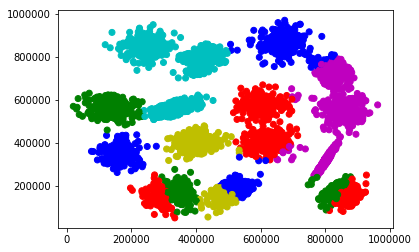

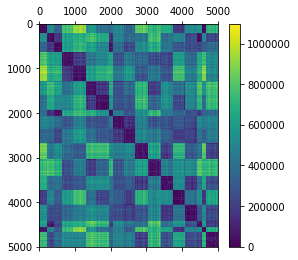

In [37]:
plt.scatter(data[:,0], data[:,1], color = col5)
plt.show()
plt.matshow(dist_pairs, aspect='auto')
plt.colorbar()
plt.show()

# Скорость алгоритма

In [38]:
%%time
model = k_means(data[:100], 5, 9)
model.run()

CPU times: user 34.7 ms, sys: 73 µs, total: 34.7 ms
Wall time: 33.6 ms


In [39]:
%%time
model = k_means(data[:1000], 5, 9)
model.run()

CPU times: user 301 ms, sys: 4.03 ms, total: 305 ms
Wall time: 301 ms


In [40]:
%%time
model = k_means(data, 5, 9)
model.run()

CPU times: user 1.63 s, sys: 3.9 ms, total: 1.64 s
Wall time: 1.64 s


## алгоритм работает за n / 2 ms в среднем

In [41]:
%%time
model = k_means(data[:100], 5, 9, "k++")
model.run()

CPU times: user 38.9 ms, sys: 0 ns, total: 38.9 ms
Wall time: 40.6 ms


In [42]:
%%time
model = k_means(data[:1000], 5, 9, "k++")
model.run()

CPU times: user 362 ms, sys: 65 µs, total: 362 ms
Wall time: 361 ms


In [43]:
%%time
model = k_means(data, 5, 9, "k++")
model.run()

CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.47 s


## алгоритм работает за O(nmkl), l - кол-во итераций, n - кол-во объектов, m - кол-во признаков, k - кол-во кластеров.
### Посмотрим сколько итераций алгоритм требует в среднем

In [44]:
mas = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    model = k_means(data, 5, i, "k++")
    model.run()
    mas.append(model.iterations)

In [45]:
import statistics
statistics.mean(mas)

14.88888888888889

### 15 итераций в среднем для 5 кластеров

#### k_means будет плохо работать когда будет несколько маленьких кластеров и 1 большой (произойдет расщепление большого на маленькие). Т.е. плотность кластеров сильно отличается
#### k_means определяет хорошо сферические кластеры. Также будет плохо работать, когда кластер будет находиться внутри другого кластера.